# 2SFCA script test at Middle Layer Super Output Areas (MSOA) level

In [1]:
from access import access, weights, datasets
import logging
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import mapclassify as mc
from legendgram import legendgram
import palettable.matplotlib as palmpl

# Data import
## Get the centroid of MSOA (demand points)

In [4]:
MSOA_points=gpd.read_file('https://github.com/LingruFeng/dissertation/blob/main/data_github/England_basemap/MSOA_Population_Weighted_Centroids_with_population.gpkg?raw=true')
MSOA_points = MSOA.to_crs('epsg:27700')

<AxesSubplot:>

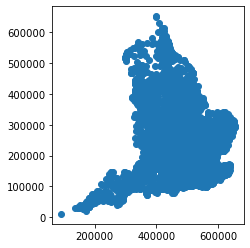

In [5]:
MSOA_points.plot()

In [10]:
MSOA

,objectid,msoa11cd,population,geometry
0,1,E02002536,9771,POINT (445582.345 524175.434)
1,2,E02002537,8641,POINT (446777.151 524256.841)
2,3,E02002534,5693,POINT (461356.929 515118.900)
3,4,E02002535,9336,POINT (446117.027 525455.836)
4,5,E02002532,6655,POINT (461053.212 516175.379)
...,...,...,...,...
6786,6787,E02004669,7496,POINT (393469.114 227500.260)
6787,6788,E02006096,7001,POINT (332829.367 109219.836)
6788,6789,E02003088,8444,POINT (343276.340 158947.520)
6789,6790,E02006070,8291,POINT (331710.269 136880.200)


## read vaccination site point data (supply points)

In [6]:
site = gpd.read_file('https://github.com/LingruFeng/dissertation/blob/main/data_github/site_2_26_clean/vaccination_site.gpkg?raw=true')
site = site.to_crs('epsg:27700')

<AxesSubplot:>

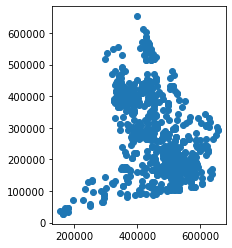

In [7]:
site.plot()

In [9]:
site

,index,hospital,pcn,pharmacy,vc,geometry
0,0,1,0,0,0,POINT (504748.029 248914.642)
1,1,1,0,0,0,POINT (505059.230 222903.988)
2,2,1,0,0,0,POINT (532504.110 176066.629)
3,3,1,0,0,0,POINT (532504.110 176066.629)
4,4,1,0,0,0,POINT (504396.617 222557.941)
...,...,...,...,...,...,...
1595,1595,0,0,0,1,POINT (196928.058 72385.978)
1596,1596,0,0,0,1,POINT (524814.936 172019.963)
1597,1597,0,0,0,1,POINT (526813.753 181129.037)
1598,1598,0,0,0,1,POINT (408626.628 90816.439)


# Calculate the Euclidean distance from demand to supply locations 

In [11]:
# Load each of the example datasets which correspond to the demand (population) and supply ('hospital','pcn','pharmacy','vc') respectively.
distance = access(demand_df = MSOA_points,
           demand_index='msoa11cd',
           demand_value='population',
           supply_df= site,
           supply_index= 'index',
           supply_value=['hospital','pcn','pharmacy','vc'])
# reproject
distance.demand_df = distance.demand_df.to_crs('epsg:27700')
distance.supply_df = distance.supply_df.to_crs('epsg:27700')

In [16]:
# Take 150000 meters as the calculation threshold
distance.create_euclidean_distance(threshold = 1000)
distance.cost_df

MemoryError: Unable to allocate 82.9 MiB for an array with shape (10865600,) and data type int64